# Preprocess response data from API

## Request API data

In [2]:
import requests
import pandas as pd

In [3]:
URL_base = 'https://www.alphavantage.co' #Se considera solo lo previo al primer slash y sin incluir a este.

End_point = '/query' #Se considera solo lo previo al signo de interrogación.

URL = URL_base + End_point

In [4]:
params = {
    "function": "TIME_SERIES_DAILY",
    "symbol": 'AAPL',
    "outputsize": "full",
    "apikey": 'G6J7BB76C6AR6WKQ'
}

In [5]:
res = requests.get(URL,params)
res.json()

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AAPL',
  '3. Last Refreshed': '2024-08-07',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2024-08-07': {'1. open': '206.8000',
   '2. high': '213.6400',
   '3. low': '206.4100',
   '4. close': '209.8200',
   '5. volume': '63414595'},
  '2024-08-06': {'1. open': '205.3000',
   '2. high': '209.9900',
   '3. low': '201.0700',
   '4. close': '207.2300',
   '5. volume': '69660488'},
  '2024-08-05': {'1. open': '199.0900',
   '2. high': '213.5000',
   '3. low': '196.0000',
   '4. close': '209.2700',
   '5. volume': '119548589'},
  '2024-08-02': {'1. open': '219.1500',
   '2. high': '225.6000',
   '3. low': '217.7100',
   '4. close': '219.8600',
   '5. volume': '105568560'},
  '2024-08-01': {'1. open': '224.3700',
   '2. high': '224.4800',
   '3. low': '217.0200',
   '4. close': '218.3600',
   '5. volume': '62500996'},
  '2024-07-31': {'1. open': 

## Convert JSON to DataFrame

Make sure to convert a repeated JSON structure to a DataFrame.

In [7]:
data = res.json()
#Guardamos la respuesta en formato JSON dentro de una variable para convertirla a DF

In [14]:
pd.DataFrame(data)
#Nos esta mostrando los metadatos, los cuales no necesitamos
#el orden campo-registro no es el deseado, por lo cual aun no es un resultado satisfactorio.

,Meta Data,Time Series (Daily)
1. Information,"Daily Prices (open, high, low, close) and Volumes",NaN
2. Symbol,AAPL,NaN
3. Last Refreshed,2024-08-07,NaN
4. Output Size,Full size,NaN
5. Time Zone,US/Eastern,NaN
...,...,...
1999-11-05,NaN,"{'1. open': '84.6200', '2. high': '88.3700', '..."
1999-11-04,NaN,"{'1. open': '82.0600', '2. high': '85.3700', '..."
1999-11-03,NaN,"{'1. open': '81.6200', '2. high': '83.2500', '..."
1999-11-02,NaN,"{'1. open': '78.0000', '2. high': '81.6900', '..."


In [88]:
df = pd.DataFrame(data['Time Series (Daily)'])
df
#Si accedemos al contenido del DF veeremos que la información de los metadatos y los datos estan dividos, entonces
#es cuestión de seleccionar el conjunto deseado (en este caso 'Time Series Daily' para obtener un DF manejable)

,2024-08-07,2024-08-06,2024-08-05,2024-08-02,2024-08-01,2024-07-31,2024-07-30,2024-07-29,2024-07-26,2024-07-25,...,1999-11-12,1999-11-11,1999-11-10,1999-11-09,1999-11-08,1999-11-05,1999-11-04,1999-11-03,1999-11-02,1999-11-01
1. open,206.8000,205.3000,199.0900,219.1500,224.3700,221.4400,219.1900,216.9600,218.7000,218.9300,...,91.9400,91.5900,88.2500,94.3700,87.7500,84.6200,82.0600,81.6200,78.0000,80.0000
2. high,213.6400,209.9900,213.5000,225.6000,224.4800,223.8200,220.3250,219.3000,219.4900,220.8500,...,92.0000,92.6200,93.2500,94.5000,97.7300,88.3700,85.3700,83.2500,81.6900,80.6900
3. low,206.4100,201.0700,196.0000,217.7100,217.0200,220.6300,216.1200,215.7500,216.0100,214.6200,...,87.3700,89.8700,88.1200,88.0000,86.7500,84.0000,80.6200,81.0000,77.3100,77.3700
4. close,209.8200,207.2300,209.2700,219.8600,218.3600,222.0800,218.8000,218.2400,217.9600,217.4900,...,90.6200,92.2500,91.4400,89.6200,96.3700,88.3100,83.6200,81.5000,80.2500,77.6200
5. volume,63414595,69660488,119548589,105568560,62500996,50036262,41643840,36311778,41601345,51391199,...,2491600,2409600,5159800,7224800,8490400,3721500,3384700,2932700,3564600,2487300


## Preprocess data

- Format columns
- Adjust DataFrame
- Convert data types
- ...

In [46]:
df = df.transpose()
#Transponemos las columnas, obteniendo el orden campo-registro deseado.

In [62]:
df.columns = df.columns.str.replace('\d\. ', '',regex=True)
#Eliminamos la numeración en los titulos de la comlumna, resultando en una visualización más limpia.

In [63]:
df.head()
# Visualizamos los cambios hechos hasta el momento, importante recordar guardar los cambios en el DF
#Como buena práctica: recordar realziar una copia en DF importantes para evitar cambios irreversibles.

,open,high,low,close,volume
1999-11-01,80.00,80.69,77.37,77.62,2487300.0
1999-11-02,78.00,81.69,77.31,80.25,3564600.0
1999-11-03,81.62,83.25,81.00,81.50,2932700.0
1999-11-04,82.06,85.37,80.62,83.62,3384700.0
1999-11-05,84.62,88.37,84.00,88.31,3721500.0


In [72]:
df.sum()
#Al tratar de realizar operaciones con los datos del DF nos percatamos de que dichos datos no son númericos
#con lo que no se puede trabajar y debemos transformar dichos datos.

open      1.082983e+06
high      1.094996e+06
low       1.070360e+06
close     1.083034e+06
volume    2.056540e+11
dtype: float64

In [73]:
df = df.astype(float)
#Realizamos la transformación de los datos a tipo float y guardamos el cambio en el DF.

In [74]:
df.sum()
#Ejecutamos una operación para comprobar que los cambios han sido éxitosos, obteniendo un DF con datos númericos.

open      1.082983e+06
high      1.094996e+06
low       1.070360e+06
close     1.083034e+06
volume    2.056540e+11
dtype: float64

<Axes: >

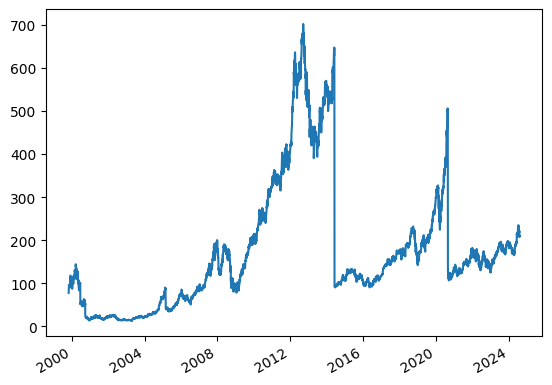

In [80]:
df['close'].plot.line()
#Ahora realizamos una gráfica de lineas con los datos del valor final en cada registro del DF.
#Sin embargo, al interpretarla observamos que los datos de las fechas van de mayor a menor,
#ademas de que los datos del eje x estan sobrepuestos y son poco legibles, con lo que realizaremos más cambios al DF.

In [81]:
df = df.sort_index()
df.head()
#Mediante el metodo sort ordenamos el índice para modificar los registros, guardamos el cambio dentro del mismo DF y comprobamos.

,open,high,low,close,volume
1999-11-01,80.00,80.69,77.37,77.62,2487300.0
1999-11-02,78.00,81.69,77.31,80.25,3564600.0
1999-11-03,81.62,83.25,81.00,81.50,2932700.0
1999-11-04,82.06,85.37,80.62,83.62,3384700.0
1999-11-05,84.62,88.37,84.00,88.31,3721500.0


In [82]:
df.index = pd.to_datetime(df.index)
#Cambiamos el tipo de dato del índice a datetime64[ns] con el próposito de hacerlo más manejable y legible al momento de trabajarlo.

<Axes: >

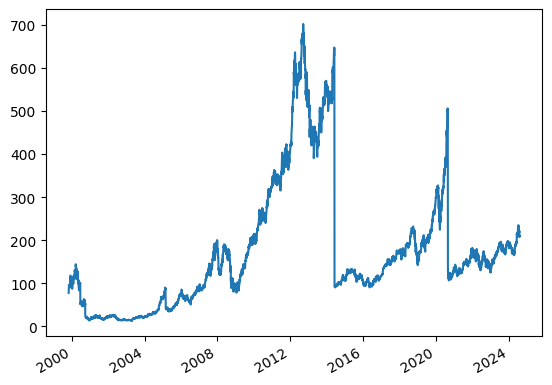

In [ ]:
df['close'].plot.line()
#Se han corregido ambas situaciones, dandonos una gráfica perfecta y lista para su presentación.

## Export to CSV

In [87]:
df.to_csv('appleStock.csv')